In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import pandas as pd

In [33]:
# 材料データ
# 各材料の
data = {
    'tomato': [1031, 644104, 1032, 527, 8723, 6184, 65064, 1068],
    'basil': [644104, 31244, 527, 8723, 6184, 439341, 72, 1110],
    'mozzarella': [1031, 1032, 6184, 1068, 31252, 31260, 72],
    'olive_oil': [6184, 31260, 5281168, 8103]
}

# 全部のIDを取得してカラム名にする
all_ids = set()
for ids in data.values():
    all_ids.update(ids)
all_ids = sorted(all_ids)

# フラグをたててマトリクスにする
binary_df = pd.DataFrame(0, index=data.keys(), columns=all_ids)
for ingredient, ids in data.items():
    binary_df.loc[ingredient, ids] = 1


binary_df = binary_df.transpose()
binary_df.tail()

,tomato,basil,mozzarella,olive_oil
31260,0,0,1,1
65064,1,0,0,0
439341,0,1,0,0
644104,1,1,0,0
5281168,0,0,0,1


In [34]:
degree_dict = dict(G.degree())
sorted_degrees = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)

# 最も接続の多い上位5つのノードを表示
print("Top 5 nodes by degree:")
for node, degree in sorted_degrees[:5]:
    print(f"Node {node}: Degree {degree}")

Top 5 nodes by degree:
Node 72: Degree 0
Node 527: Degree 0
Node 1031: Degree 0
Node 1032: Degree 0
Node 1068: Degree 0


In [35]:
# 共起関係を計算
co_occurrence = binary_df.T.dot(binary_df)
co_occurrence

,tomato,basil,mozzarella,olive_oil
tomato,8,4,4,1
basil,4,8,2,1
mozzarella,4,2,7,2
olive_oil,1,1,2,4


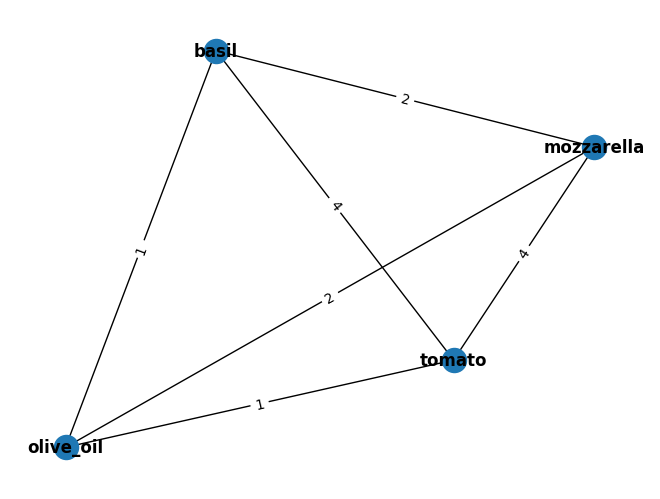

In [37]:
# ネットワークの作成
G = nx.Graph()

# ノードとエッジを追加
for ingredient in co_occurrence.columns:
    G.add_node(ingredient)

for i, j in itertools.combinations(co_occurrence.columns, 2):
    weight = co_occurrence.at[i, j]
    if weight > 0:  # 共起頻度が0より大きい場合のみエッジを追加
        G.add_edge(i, j, weight=weight)

# ネットワークの描画
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')

# エッジのラベル（重み）を表示
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()